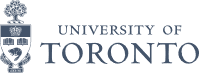

# Session 3B: ¿Generative AI? - Digit Exploration

Nowadays we hear a lot about AI and **generative AI**. Although it is a complex subject, **we propose here a couple of examples of autoencoders** that will allow you to have a **certain perspective** of its operation and what it means.

# Autoencoders

An autoencoder **is a type of deep learning network** that is trained to replicate its input data. Autoencoders have surpassed traditional engineering techniques in accuracy and performance on many applications, including anomaly detection, text generation, image generation, image denoising, and digital communications. [Ref](https://www.mathworks.com/discovery/autoencoder.html)

## How Do Autoencoders Work?

**Autoencoders** output as a reconstruction of the input. The autoencoder consists of **two network**s: an **encoder** and a **decoder**. During training, the **encoder** **learns a set of features**, known as a **latent representation**, from input data. At the same time, the **decoder** is trained to **reconstruct** the data based on **these features**. The **autoencoder** can then be applied to **predict** **inputs** not previously seen. Autoencoders are **very generalizable** and can be used on different data types, including images, time series, and text. [Ref](https://www.mathworks.com/discovery/autoencoder.html)

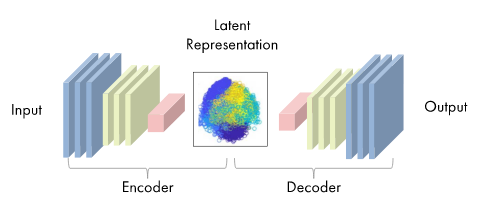

[Ref](https://www.mathworks.com/discovery/autoencoder.html)

Here follows some examples you could go to review in detail the examples that we will replicate here in a summarized way.

https://www.kaggle.com/code/roblexnana/understanding-auto-encoder-on-mnist-digit-dataset

https://www.kaggle.com/code/robinteuwens/anomaly-detection-with-auto-encoders

# Application of computer Vision: Understand Unsupervised learning auto-encoders with MNIST (Modified National Institute of Standards and Technology database) digit dataset.
## Table of interest:
1. Introduction
2. Import all required Library
3. Data Exploration and visualization.
4. Building of our Auto-encoder.
5. Model trainning and predict.
6. Model evaluation.
7. Latent Space


## 1. Introduction

Let's start by understanding the operation of an auto-encoder.

* Autoencoders are a class of neural network that attempt to recreate the input as its target using backpropagation. An autoencoder consists of two parts, an encoder and a decoder. The encoder will read the input and compress it to a compact representation, and the decoder will read the compact representation and recreate the input from it. In other words, the autoencoder tries to learn the identity function by minimizing the reconstruction error.

* The number of hidden units in the autoencoder is typically less than the number of input (and output) units. This forces the encoder to learn a compressed representation of the input which the decoder reconstructs. If there is structure in the input data in the form of correlations between input features, then the autoencoder will discover some of these correlations, and end up learning a low dimensional representation of the data similar to that learned using principal component analysis (**PCA**).

* The encoder and decoder components of an autoencoder can be implemented using either dense, convolutional, or recurrent networks, depending on the kind of data that is being modeled.

* Autoencoders can also be stacked by successively stacking encoders that compress their input to smaller and smaller representations, and stacking decoders in the opposite sequence. Stacked autoencoders have greater expressive power and the successive layers of representations capture a hierarchical grouping of the input, similar to the convolution and pooling operations in convolutional neural networks.

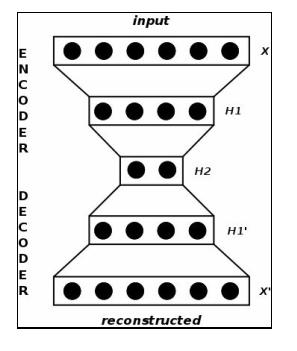!

* For example in the network shown above, we would first train layer **X** to reconstruct layer **X'** using the hidden layer **H1** (**ignoring H2**). We would then train the layer **H1** to reconstruct layer **H1'** using the hidden layer **H2**. Finally, we would stack all the layers together in the configuration shown and fine tune it to reconstruct **X'** from **X**. With better activation and regularization functions nowadays, however, it is quite common to train these networks in totality.

Now let's apply this principe of operation to our famous MNIST digit dataset.

## 2. Import all required libraries



```
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
```



In [20]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Model
from keras.models import load_model
from keras.layers import Input
from keras.layers import Dense

## 3. Data exploration and visualization

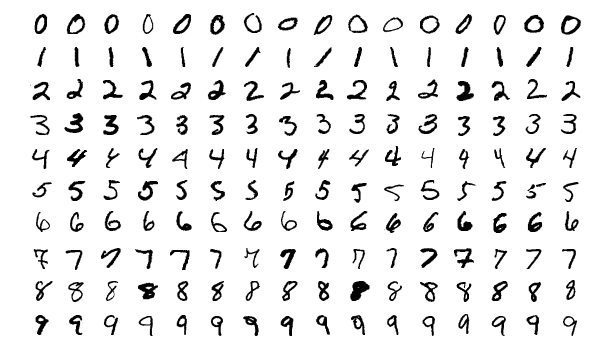

Let's import the dataset.



```
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```



In [21]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

Let's represent some of them



```
n_rows=10;n_col=16; starting_registy=500
fig, axs = plt.subplots(n_rows,n_col);
for i in range(n_col*n_rows):
    axs[int(i/n_col),i%n_col].imshow((((x_train[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');
    axs[int(i/n_col),i%n_col].axis('off')
```



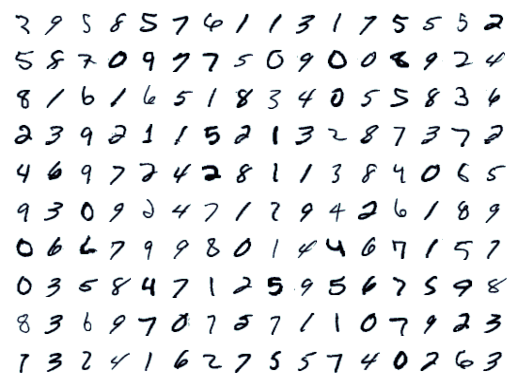

In [22]:
n_rows=10; n_col=16; starting_registy=500
fig, axs = plt.subplots(n_rows,n_col)
for i in range(n_col*n_rows):
    axs[int(i/n_col),i%n_col].imshow((((x_train[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');
    axs[int(i/n_col),i%n_col].axis('off')

## 4. Building of our auto-encoder

Our model has only one hidden(**encoded layer**) layer with 32 units neurons. The input and output layer(**decoded layer**) have each 784 units neurons.


```
n_samples,n_features=np.shape(x_train);
bottleneck_size = 2;
#cone=[512,128,64];

input_img = Input(shape=(n_features,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')
```

In [23]:
n_samples,n_features=np.shape(x_train);
bottleneck_size = 2;
# cone=[512,128,64];

input_img = Input(shape=(n_features,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

## 5. Model trainning and predict

The `fit()` method on a Keras Model returns a `ae` object.

The `ae.history` attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
For our model we don't have metrics values because we didn't specify metrics when we compiled the model.



```
AE_Training_History=ae.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_test, x_test))

save_model=False
if save_model:
    ae.save('model.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')
```



In [24]:
AE_Training_History = ae.fit(x_train, x_train, epochs = 10, batch_size = 256, validation_data = (x_test, x_test))

save_model = False
if save_model:
    ae.save('model.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 0.0904 - val_loss: 0.0520
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 0.0509 - val_loss: 0.0467
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0458 - val_loss: 0.0436
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0430 - val_loss: 0.0421
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0415 - val_loss: 0.0407
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 0.0405 - val_loss: 0.0399
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 0.0396 - val_loss: 0.0394
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0390 - val_loss: 0.0388
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0384 - val_loss: 0.0385
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 0.0381 - val_loss: 0.0379


Now let's see how it works





```
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
```



In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Let's plot a few of them ...



```
n_rows=10;n_col=2; starting_registy=200
fig, axs = plt.subplots(n_rows,n_col);
for i in range(n_rows):
    axs[i,0].imshow((((x_test[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[i,0].axis('off')
    axs[i,1].imshow((((decoded_imgs[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[i,1].axis('off')
```



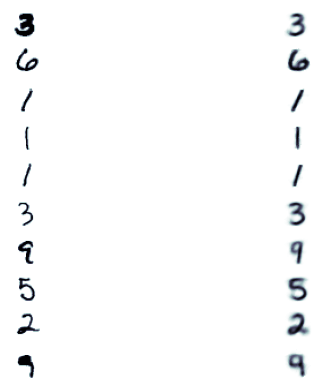

In [26]:
n_rows=10; n_col=2; starting_registy=200
fig, axs = plt.subplots(n_rows, n_col)
for i in range(n_rows):
    axs[i,0].imshow((((x_test[i+starting_registy,:])-255)*-1).reshape(28,28), cmap='bone'); axs[i,0].axis('off')
    axs[i,1].imshow((((decoded_imgs[i+starting_registy,:])-255)*-1).reshape(28,28), cmap='bone'); axs[i,1].axis('off')

Quite similar... isn't it?

## 5. Evaluating results





```
# list all data in history
print(AE_Training_History.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History.history['loss'])
plt.plot(AE_Training_History.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```



dict_keys(['loss', 'val_loss'])


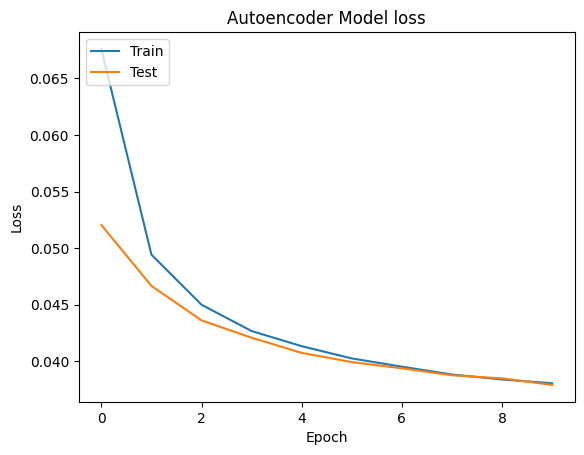

In [27]:
# list all data in history
print(AE_Training_History.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History.history['loss'])
plt.plot(AE_Training_History.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 6. Latent Space

Now we will plot the latent space for this test samples



```
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x=encoded_imgs[np.where(y_test==i)][:,0], y=encoded_imgs[np.where(y_test==i)][:,1],mode='markers',name=str(i)))

fig.show()
```



In [28]:
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x = encoded_imgs[np.where(y_test==i)][:,0],
                             y = encoded_imgs[np.where(y_test==i)][:,1],
                             mode = 'markers',
                             name = str(i)))
fig.show()

## 7. Generative image from any coordinates inside the 2D latent space?

If we pick any point in this domain, *do you think the generative image would be similar enough to the surrounding class?*

To test it, **observe again the image** and try to identify a cluster of points where you can **allocate coordinates free from samples** (inside a gap surrounded by samples of the very same class).


### Latent Domain Image by Class

```
#@title Latent Domain Image by Class
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x=encoded_imgs[np.where(y_test==i)][:,0], y=encoded_imgs[np.where(y_test==i)][:,1],mode='markers',name=str(i)))

fig.show()
```

In [29]:
# @title Latent Domain Image by Class
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter(x = encoded_imgs[np.where(y_test==i)][:,0],
                             y = encoded_imgs[np.where(y_test==i)][:,1],
                             mode = 'markers',
                             name = str(i)))

fig.show()

Now, just **pick** your **x_coordinate and y_coordiante** **free from samples** but **surrounded by one single class**, and type in lines 2 and 3 of the following code. In my picture I found **`(10,-10)`**, inside the **"2" class-cluster**.



```
# Pick  the point in the domain
x_coordinate=10;
y_coordiante=-10;

# Let's create a "new number not in the sample base"
Encoded_Generative_IMG=np.array([[x_coordinate,y_coordiante]]);

# Let's decode this "generaive sample"
Decoded_Generative_IMG= decoder.predict(Encoded_Generative_IMG);

# Let's plot the output of the generative sample
plt.figure(figsize=(1,1));plt.imshow(((Decoded_Generative_IMG-255)*-1).reshape(28,28),cmap='bone');plt.axis('off');plt.title('Generative Image');
```



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Text(0.5, 1.0, 'Generative Image')

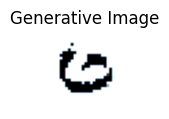

In [30]:
# Pick  the point in the domain
x_coordinate=600
y_coordiante=350

# Let's create a "new number not in the sample base"
Encoded_Generative_IMG = np.array([[x_coordinate,y_coordiante]])

# Let's decode this "generaive sample"
Decoded_Generative_IMG = decoder.predict(Encoded_Generative_IMG)

# Let's plot the output of the generative sample
plt.figure(figsize=(1,1))
plt.imshow(((Decoded_Generative_IMG-255)*-1).reshape(28,28), cmap='bone')
plt.axis('off');plt.title('Generative Image')

Play arround with different values and coodinates to evaluate your model, inside teh gaps of the same class, but you can also check in the boudaries among classes. You might be able to find interesting things.

**Let's do it step by step...**

Here you have the very same code, but step by step .... you might not need it, but if you do, please feel free to play arround with this sections.

Let's set the coordiantes and create a `np.array` with shape `1-by-2`.



```
# Pick  the point in the domain
x_coordinate=10;
y_coordiante=-10;

# Let's create a "new number not in the laten domain"
Encoded_Generative_IMG=np.array([[x_coordinate,y_coordiante]]);
# or
# Encoded_Generative_IMG=np.array([x_coordinate,y_coordiante]).reshape(1,2);
```



In [31]:
# Pick  the point in the domain
x_coordinate=10
y_coordiante=-10

# Let's create a "new number not in the laten domain"
Encoded_Generative_IMG=np.array([[x_coordinate,y_coordiante]])
# or
# Encoded_Generative_IMG=np.array([x_coordinate,y_coordiante]).reshape(1,2);

Le's use the **`decoder.predict`** command **to get** the **Generatie Output**.




```
# Let's decode this "generaive sample"
Decoded_Generative_IMG= decoder.predict(Encoded_Generative_IMG);
```



In [32]:
# Let's decode this "generaive sample"
Decoded_Generative_IMG= decoder.predict(Encoded_Generative_IMG);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Now let's just plot it.



```
# Let's plot the output of the generative sample
plt.figure(figsize=(1,1));plt.imshow(((Decoded_Generative_IMG-255)*-1).reshape(28,28),cmap='bone');plt.axis('off');plt.title('Generated Image');
```



Text(0.5, 1.0, 'Generated Image')

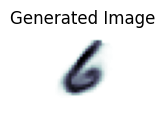

In [33]:
# Let's plot the output of the generative sample
plt.figure(figsize=(1,1))
plt.imshow(((Decoded_Generative_IMG-255)*-1).reshape(28,28),cmap='bone')
plt.axis('off');plt.title('Generated Image')

Does it look right? - Yes.

# Autoencoder 3 Dimensions in the lantent space

Let's know replicate the very same code but with 3 variables in the latent space.

### Import packages

```
#@title Import packages
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
```



### Import dataset

```
#@title Import dataset
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```



In [34]:
# @title Import dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

### Define Autoencoder

```
#@title Define Autoencoder
n_samples,n_features=np.shape(x_train);
bottleneck_size = 3;
#cone=[512,128,64];

input_img3d = Input(shape=(n_features,))

encoded3d = Dense(512, activation='relu')(input_img3d)
encoded3d = Dense(128, activation='relu')(encoded3d)
encoded3d = Dense(64, activation='relu')(encoded3d)
encoded3d = Dense(bottleneck_size, activation='linear')(encoded3d)
encoder3d = Model(input_img3d, encoded3d)


encoded_input3d = Input(shape=(bottleneck_size,))
decoded3d = Dense(64, activation='relu')(encoded_input3d)
decoded3d = Dense(128, activation='relu')(decoded3d)
decoded3d = Dense(512, activation='relu')(decoded3d)
decoded3d = Dense(n_features, activation='sigmoid')(decoded3d)
decoder3d = Model(encoded_input3d, decoded3d)

full3d = decoder3d(encoder3d(input_img3d))
ae3d = Model(input_img3d, full3d)
ae3d.compile(optimizer='adam', loss='mean_squared_error')
```



In [35]:
# @title Define Autoencoder
n_samples,n_features=np.shape(x_train);
bottleneck_size = 3;
# cone=[512,128,64];

input_img3d = Input(shape=(n_features,))

encoded3d = Dense(512, activation='relu')(input_img3d)
encoded3d = Dense(128, activation='relu')(encoded3d)
encoded3d = Dense(64, activation='relu')(encoded3d)
encoded3d = Dense(bottleneck_size, activation='linear')(encoded3d)
encoder3d = Model(input_img3d, encoded3d)


encoded_input3d = Input(shape=(bottleneck_size,))
decoded3d = Dense(64, activation='relu')(encoded_input3d)
decoded3d = Dense(128, activation='relu')(decoded3d)
decoded3d = Dense(512, activation='relu')(decoded3d)
decoded3d = Dense(n_features, activation='sigmoid')(decoded3d)
decoder3d = Model(encoded_input3d, decoded3d)

full3d = decoder3d(encoder3d(input_img3d))
ae3d = Model(input_img3d, full3d)
ae3d.compile(optimizer='adam', loss='mean_squared_error')

### Training Autoencoder

```
#@title Training Autoencoder
AE_Training_History3d=ae3d.fit(x_train, x_train,
    epochs = 10,
    batch_size=256,
    validation_data=(x_test, x_test))

save_model=False
if save_model:
    ae3d.save('model.h5')
    encoder3d.save('encoder.h5')
    decoder3d.save('decoder.h5')
```



In [36]:
# @title Training Autoencoder
AE_Training_History3d=ae3d.fit(x_train, x_train, epochs = 10, batch_size=256, validation_data=(x_test, x_test))

save_model=False
if save_model:
    ae3d.save('model.h5')
    encoder3d.save('encoder.h5')
    decoder3d.save('decoder.h5')

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - loss: 0.0869 - val_loss: 0.0444
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0433 - val_loss: 0.0401
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 0.0394 - val_loss: 0.0381
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0375 - val_loss: 0.0361
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0356 - val_loss: 0.0349
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0344 - val_loss: 0.0342
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.0336 - val_loss: 0.0335
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0328 - val_loss: 0.0327
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0321 - val_loss: 0.0323
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.0317 - val_loss: 0.0319


### Run Autoencoder over Test Set

```
#@title Run Autoencoder over Test Set
encoded_imgs3d = encoder3d.predict(x_test)
decoded_imgs3d = decoder3d.predict(encoded_imgs3d)
```



In [37]:
# @title Run Autoencoder over Test Set
encoded_imgs3d = encoder3d.predict(x_test)
decoded_imgs3d = decoder3d.predict(encoded_imgs3d)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


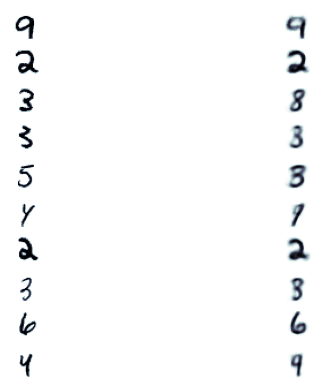

In [38]:
#@title Match Input to Output
n_rows=10;n_col=2; starting_registy=500
fig, axs = plt.subplots(n_rows,n_col);
for i in range(n_col*n_rows):
    axs[int(i/n_col),0].imshow((((x_test[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[int(i/n_col),0].axis('off')
    axs[int(i/n_col),1].imshow((((decoded_imgs3d[i+starting_registy,:])-255)*-1).reshape(28,28),cmap='bone');axs[int(i/n_col),1].axis('off')

### Training Statistics

```
#@title Training Statistics
# list all data in history
print(AE_Training_History3d.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History3d.history['loss'])
plt.plot(AE_Training_History3d.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```



dict_keys(['loss', 'val_loss'])


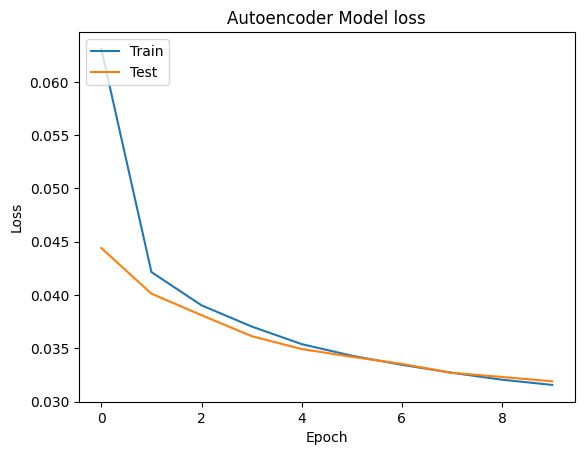

In [39]:
# @title Training Statistics
# list all data in history
print(AE_Training_History3d.history.keys())
# visualization of the loss minimization during the training process
plt.plot(AE_Training_History3d.history['loss'])
plt.plot(AE_Training_History3d.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Latent Space Representation

```
#@title Latent Space Representation
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter3d(x=encoded_imgs3d[np.where(y_test==i)][:,0], y=encoded_imgs3d[np.where(y_test==i)][:,1],z=encoded_imgs3d[np.where(y_test==i)][:,2],mode='markers',name=str(i)))

fig.show()
```



In [40]:
#@title Latent Space Representation
import plotly.graph_objects as go
fig = go.Figure()
for i in range(len(np.unique(y_test))):
    fig.add_trace(go.Scatter3d(x=encoded_imgs3d[np.where(y_test==i)][:,0],
                               y=encoded_imgs3d[np.where(y_test==i)][:,1],
                               z=encoded_imgs3d[np.where(y_test==i)][:,2],
                               mode='markers',
                               name=str(i)))

fig.show()

If you have the chance ... please go to this site:

https://github.com/gr-b/autoencoder-latent-space-visualization